In [13]:
import os
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tesser import fit
from tesser import util
from tesser import sr

## Load data for all subjects

In [2]:
data_dir = '/Users/morton/Dropbox/data/tesser'
struct = util.load_struct(data_dir)
induct = util.load_induct(data_dir)

## Fit each individual subject

In [7]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
results = fit.fit_induct_indiv(struct, induct, fixed, var_names, var_bounds)

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...


/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:46: RuntimeWarning: invalid value encountered in double_scalars
  (SR[cue, opt[0]] ** tau + SR[cue, opt[1]] ** tau))
/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:45: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((SR[cue, opt[response]] ** tau) /


Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating parameters for 132...
Estimating parameters for 133...
Estimating parameters for 135...
Estimating parameters for 136...
Estimating parameters for 137...
Estimating parameters for 138...


In [63]:
#results = results.set_index('subject')
results.to_csv(os.path.join('~/work/indiv_param.csv'))
results

,gamma,alpha,tau,log_like
subject,,,,
100,1.000000e+00,0.868522,0.406603,-28.982943
101,9.920991e-01,0.712507,2.714392,-25.406298
102,7.763768e-01,0.022943,0.725346,-20.825487
103,9.253540e-01,0.685406,1.307401,-25.866600
104,1.000000e+00,0.633356,1.224772,-28.726881
105,1.000000e+00,0.129351,2.040551,-22.919007
106,7.034455e-01,0.103798,0.894549,-24.974311
107,9.924539e-01,0.937988,1.459438,-27.662605
108,9.977641e-01,0.600538,0.656211,-28.698749


## Get response probabilities for the fitted models

In [14]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct.query(subj_filter)
    subj_induct = induct.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau']}
    res = fit.assess_induct_fit_subject(subj_struct, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

## Plot individual differences in induction

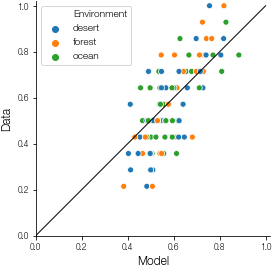

In [50]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

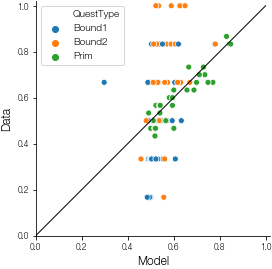

In [51]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

## Plot group means

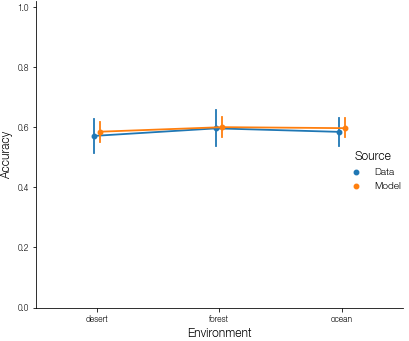

In [58]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

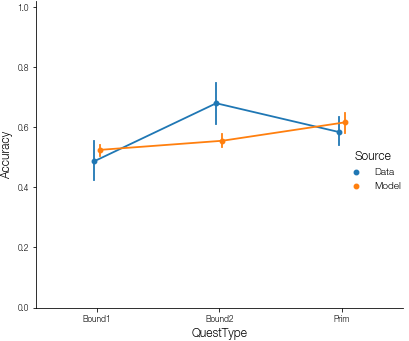

In [59]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));